# I. Import embeddings and useful functions

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from src.data_loading import load_data_from_path_en_fr, index_to_drop, normalize_matrix_by_row
from src.optimisation_functions import gradient_descent, batch_gradient_descent, batch_gradient_descent_full_procustes, gradient_descent_projected
from src.test_functions_fixed import get_nn_scores_fixed, test_translation_fixed

In [18]:
import fasttext
import numpy as np 
np.random.seed(42) #to fix randomness
import matplotlib.pyplot as plt

# II. Load data

In [19]:
#files obtain from pre-treatement related to Hamza's work

words_train_fr = np.load('imports/fr->en/Words_fr_eng_train.npy')
words_train_en = np.load('imports/fr->en/Trad_fr_eng_train.npy')
X_train = np.load('imports/fr->en/X_train_fr_eng.npy')
X_test = np.load('imports/fr->en/X_test_fr_eng.npy')

words_test_fr = np.load('imports/fr->en/Words_fr_eng_test.npy')
words_test_en = np.load('imports/fr->en/Trad_fr_eng_test.npy')
Y_train = np.load('imports/fr->en/Y_train_fr_eng.npy') 
Y_test = np.load('imports/fr->en/Y_test_fr_eng.npy')

In [20]:
X_train_normalized, Y_train_normalized = normalize_matrix_by_row(X_train), normalize_matrix_by_row(Y_train) 
X_test_normalized, Y_test_normalized = normalize_matrix_by_row(X_test), normalize_matrix_by_row(Y_test)

In [21]:
#for testing various numerical treatments
words_test_full_en =  np.concatenate((words_test_en, words_train_en))
Y_test_full = np.vstack((Y_test, Y_train))
Y_test_full_normalized = np.vstack((Y_test_normalized, Y_train_normalized))

# III. Numerical Treatment

### 0. Gradient descent with Euler distance and no constraints (limited iteration)

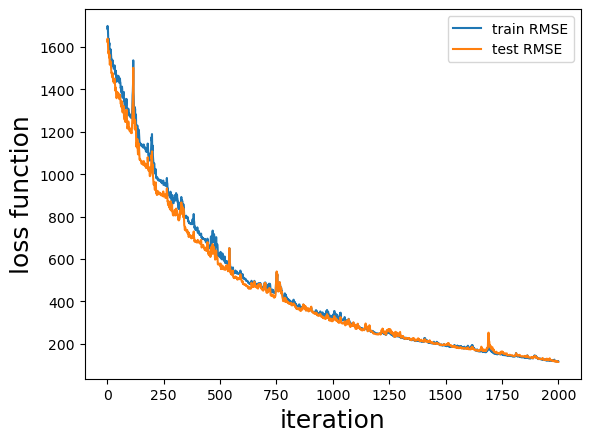

In [28]:
#first we try a solution a quick solution with 1000 iteration, we well later use it for comparison with another method
nb_of_iterations = 2000
step_size = 0.01

W_opt_full_gd,iteration,loss_function_train_array_full_gd, loss_function_test_array_full_gd  = batch_gradient_descent(X_train, Y_train, X_test, Y_test, nb_of_iterations, step_size, batch_percentage = 0.0001, early_stopping=False)

plt.plot(iteration, loss_function_train_array_full_gd, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_full_gd, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [29]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation

get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_fr, src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, epsilon = 1e-7)

Nearest neighbors of "agrandir":
0.2662 - bold
0.2662 - bold
0.2662 - bold
0.2662 - bold
0.2610 - existing


##### b. Test on a the whole test set

In [30]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, limit= 3000)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 30.8 %


In [31]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=1, limit= 3000)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 19.2 %


### 1. Gradient descent with Euler distance and no constraints

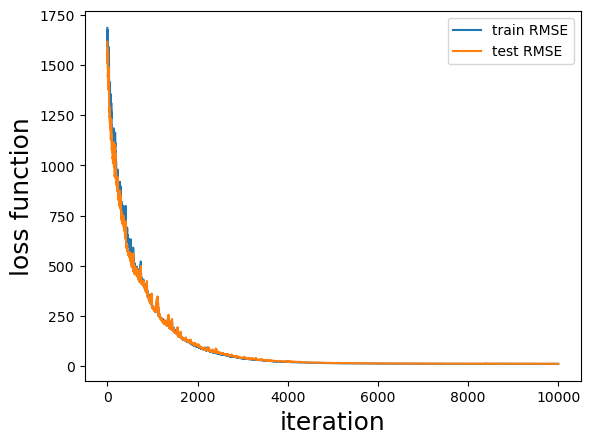

In [32]:
#high number of iteration
nb_of_iterations = 10000
step_size = 0.01

W_opt_full_gd,iteration,loss_function_train_array_full_gd, loss_function_test_array_full_gd  = batch_gradient_descent(X_train, Y_train, X_test, Y_test, nb_of_iterations, step_size, batch_percentage = 0.0001, early_stopping=False)

plt.plot(iteration, loss_function_train_array_full_gd, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_full_gd, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

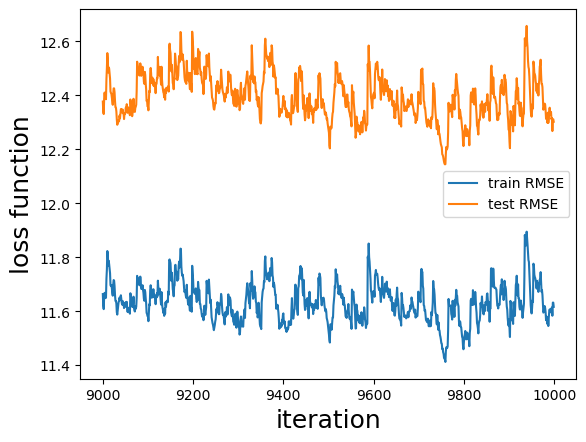

In [33]:
#last iterations
plt.plot(iteration[-1000:], loss_function_train_array_full_gd[-1000:], label = "train RMSE")
plt.plot(iteration[-1000:], loss_function_test_array_full_gd[-1000:], label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [34]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation

get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_fr, src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, epsilon = 1e-7)

Nearest neighbors of "agrandir":
0.5692 - expand
0.5692 - expand
0.5692 - expand
0.5508 - adjacent
0.5508 - adjacent


##### b. Test on a the whole test set

In [35]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, limit= 3000)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 80.8 %


In [37]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=1, limit= 3000)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 70.4 %


### 1bis. Gradient descent with Euler distance and no constraints (GD)

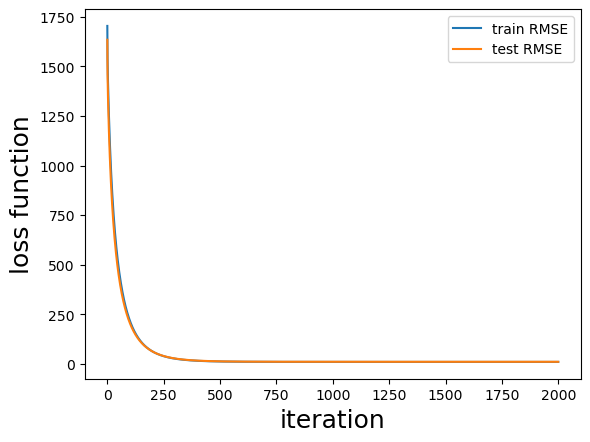

In [38]:
#high number of iteration
nb_of_iterations = 2000
step_size = 0.1

W_opt_full_gd,iteration,loss_function_train_array_full_gd, loss_function_test_array_full_gd  = gradient_descent(X_train, Y_train, X_test, Y_test, nb_of_iterations, step_size, early_stopping=False)

plt.plot(iteration, loss_function_train_array_full_gd, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_full_gd, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [40]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation

get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_fr, src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, epsilon = 1e-7)

Nearest neighbors of "agrandir":
0.6397 - expand
0.6397 - expand
0.6397 - expand
0.5899 - adjacent
0.5899 - adjacent


##### b. Test on the whole test set

In [41]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=5, limit= 3000)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 83.2 %


In [42]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_gd, K=1, limit= 3000)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 74.2 %


### 2. Projected gradient descent with cosine similarity and orthogonal constraints

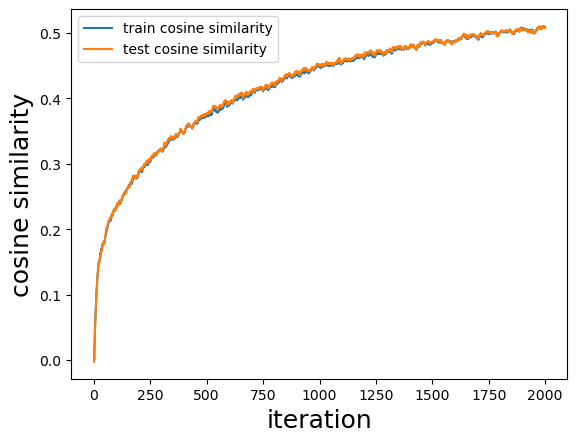

In [43]:
nb_of_iterations = 2000 #very long for a low number of iteratin, 1000 for comparison with classic GD, could put more (depend on our patience)
step_size = 1

W_opt_full_procuste,iteration,loss_function_train_array_full_procustes, loss_function_test_array_full_procustes  = batch_gradient_descent_full_procustes(X_train_normalized, Y_train_normalized, X_test_normalized, Y_test_normalized, nb_of_iterations, step_size, batch_percentage = 0.0001 , early_stopping = False)

plt.plot(iteration, loss_function_train_array_full_procustes, label = "train cosine similarity")
plt.plot(iteration, loss_function_test_array_full_procustes, label = "test cosine similarity")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("cosine similarity", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [44]:
get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_fr, src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_procuste, K=5, epsilon = 1e-7)

Nearest neighbors of "agrandir":
0.5834 - expand
0.5834 - expand
0.5834 - expand
0.4723 - expanded
0.4723 - expanded


##### b. Test on the whole test set

In [45]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_procuste, limit=3000, K=5)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 77.4 %


In [46]:
good_translation_1 =  test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_full_procuste, limit=3000, K=1)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P1 accuracy is {round(accuracy_1,2)} %")

The P1 accuracy is 65.8 %


### 3. Procrustes closed form solution

In [47]:
#no iteration, closed form solution 
U, S, V =  np.linalg.svd(X_train.T@Y_train)
W_opt_procrustes_closed = U@V

##### a. Test on a single word

In [48]:
get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_fr, src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_procrustes_closed, K=5, epsilon = 1e-7)

Nearest neighbors of "agrandir":
0.6427 - expand
0.6427 - expand
0.6427 - expand
0.5515 - build
0.5515 - build


##### b. Test on the whole test set

In [49]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_procrustes_closed, limit=3000, K=5)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 84.6 %


In [50]:
good_translation_1 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_procrustes_closed, limit=3000, K=1)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P5 accuracy is {round(accuracy_1,2)} %")

The P5 accuracy is 75.0 %


### 4. Gradient descent with Euler distance and orthogonal constraints

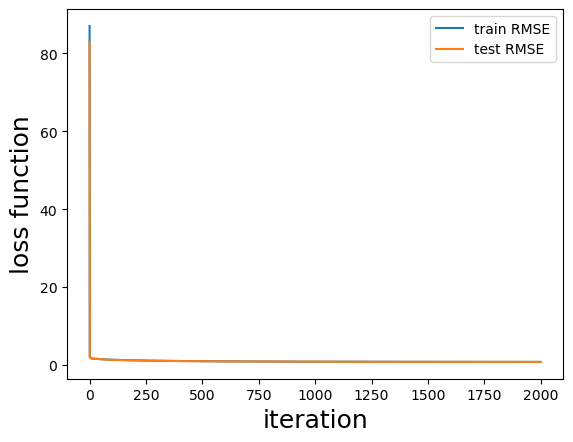

In [51]:
nb_of_iterations = 2000
step_size = 1

W_opt_projected_semi,iteration,loss_function_train_array_projected, loss_function_test_array_projected  = gradient_descent_projected(X_train_normalized,Y_train_normalized,X_test_normalized, Y_test_normalized, nb_of_iterations, step_size)

plt.plot(iteration, loss_function_train_array_projected, label = "train RMSE")
plt.plot(iteration, loss_function_test_array_projected, label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

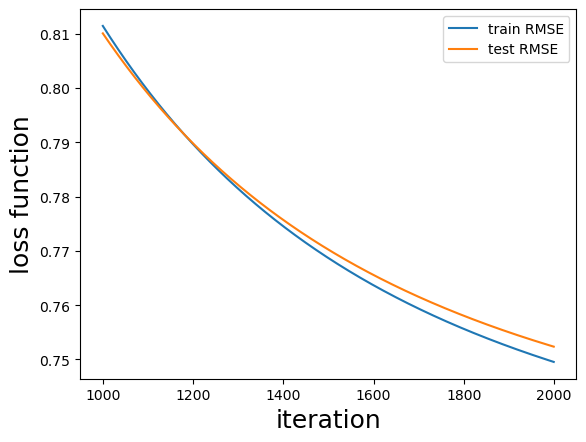

In [52]:
plt.plot(iteration[-1000:], loss_function_train_array_projected[-1000:], label = "train RMSE")
plt.plot(iteration[-1000:], loss_function_test_array_projected[-1000:], label = "test RMSE")
plt.xlabel("iteration", rotation=0, fontsize=18)
plt.ylabel("loss function", rotation=90, fontsize=18)
plt.legend()
plt.show()

##### a. Test on a single word

In [53]:
# printing nearest neighbors in the target space
#the word to test needs to be in the whole elements of words, otherwise it's impossible to find a translation
get_nn_scores_fixed(idx_word_to_test = 15, words_start = words_test_fr, src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_projected_semi, K=5, epsilon = 1e-7)

Nearest neighbors of "agrandir":
0.6525 - expand
0.6525 - expand
0.6525 - expand
0.5455 - build
0.5455 - build


##### b. Test on a the whole test set

In [54]:
good_translation_5 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_projected_semi, limit=3000, K=5)
accuracy_5 = np.sum(good_translation_5)/len(good_translation_5)*100
print(f"The P5 accuracy is {round(accuracy_5,2)} %")

The P5 accuracy is 84.4 %


In [55]:
good_translation_1 = test_translation_fixed(src_emb = X_test, words_arrival = words_test_full_en, tgt_emb = Y_test_full, W = W_opt_projected_semi, limit=3000, K=1)
accuracy_1 = np.sum(good_translation_1)/len(good_translation_1)*100
print(f"The P5 accuracy is {round(accuracy_1,2)} %")

The P5 accuracy is 74.8 %
